# Bank Customer Churn Prediction

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_orig = pd.read_csv('cust_data.csv', sep=None)

## Exploratory Data Analysis

In [3]:
df_orig.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df_orig.shape

(10000, 14)

In [5]:
# null values and datatypes
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df_orig.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
print("MEDIAN")
for col in df_orig[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]:
    print(col + ":", df_orig[col].median())

MEDIAN
CreditScore: 652.0
Age: 37.0
Tenure: 5.0
Balance: 97198.54000000001
NumOfProducts: 1.0
EstimatedSalary: 100193.915


In [8]:
df = df_orig.copy()

In [9]:
df = df.drop(['RowNumber', 'Surname'], axis=1)

In [10]:
# distinct values per column
for col in df.columns:
    print(col, df[col].unique())

CustomerId [15634602 15647311 15619304 ... 15584532 15682355 15628319]
CreditScore [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 

In [11]:
convert_to_boolean = ['IsActiveMember', 'HasCrCard', 'Exited']
for col in convert_to_boolean:
    df[col] = df[col].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  bool   
 9   IsActiveMember   10000 non-null  bool   
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 732.5+ KB


### Target variable

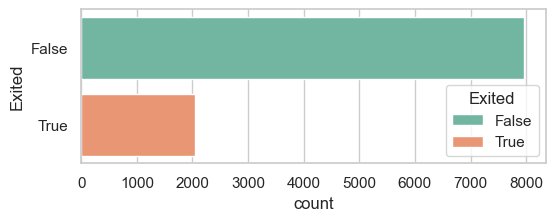

In [12]:
# check for imbalance in target value
sns.set(style="whitegrid")
plt.figure(figsize=(6, 2))
ax = sns.countplot(data=df, y=df['Exited'], hue=df['Exited'], palette="Set2")

plt.show()

In [13]:
imbalance_ratio = df[df['Exited']==0].shape[0] / df[df['Exited']==1].shape[0]
print("Ratio between Not exited and Exited: ", round(imbalance_ratio, 2))

Ratio between Not exited and Exited:  3.91


-> Handle imbalance of dataset with regard to target variable during Data Preprocessing

### Numerical columns

In [14]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [15]:
df[num_cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


- CreditScore: only ranges from 350 to 850
- Age: Minimum age to be a customer is 18; mean and median do not differ signficantly
- Tenure: No one is a customer for longer than 10 years -> total existence of the bank?
- Balance: Median is higher than Mean by more than 20.000
- NumOfProducts: Majority with less than 2 products
- EstimatedSalary: Mininum of 11.6 looks unusual -> data quality issue?

-> check data quality of EstimatedSalary due to unusual minimum value

#### Distribution

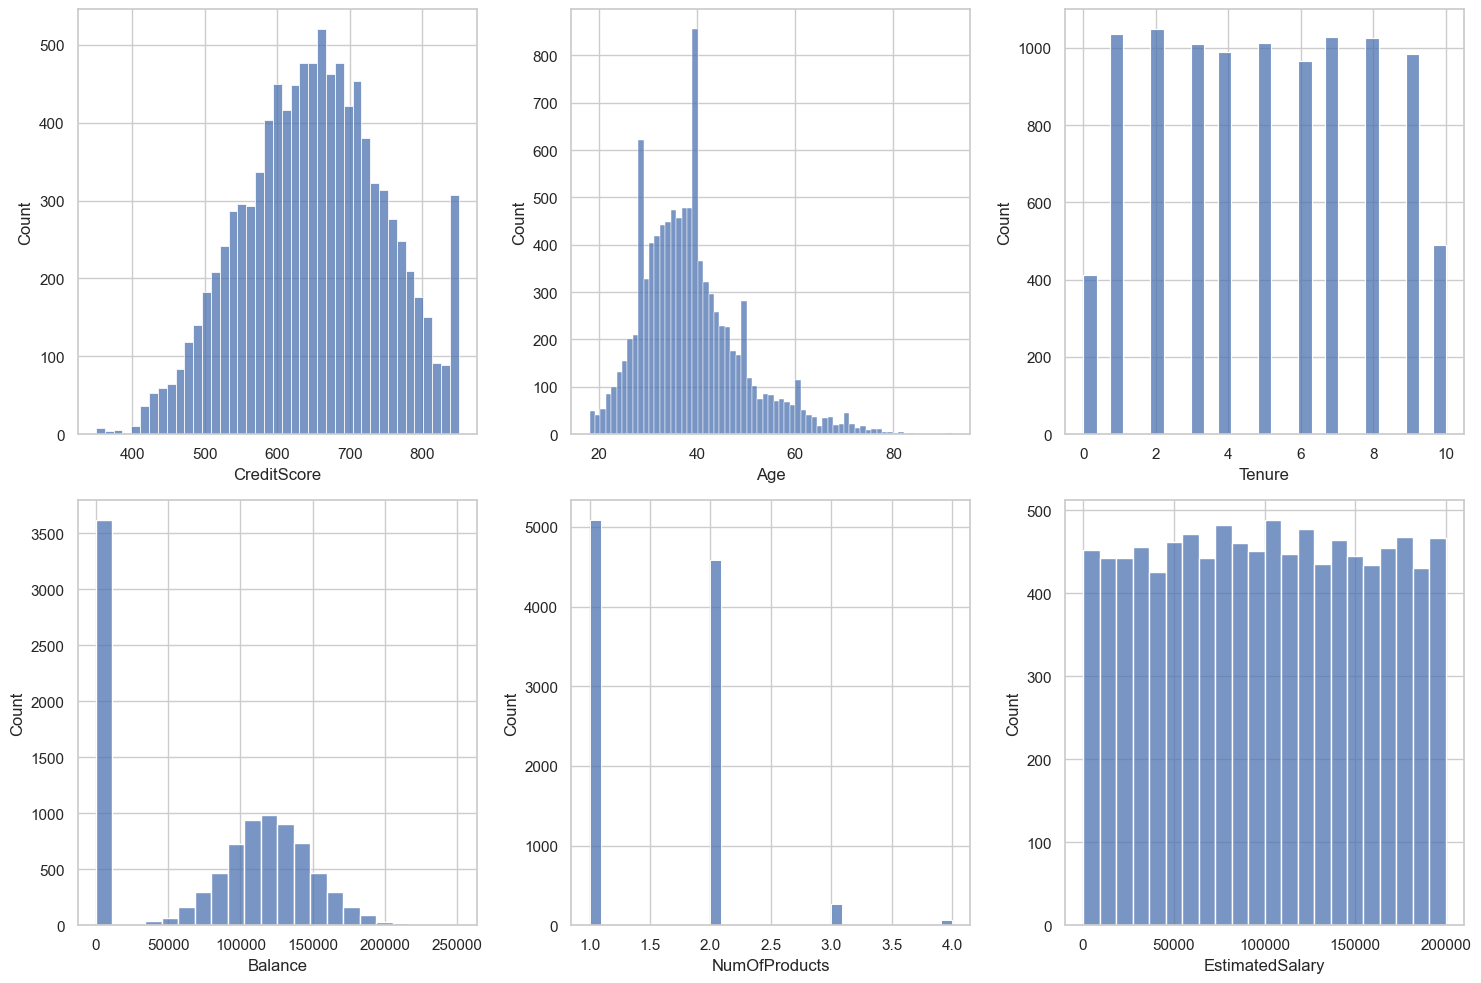

In [16]:
# without differentiation between target variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for ax, col in zip(axes.flatten(), num_cols):
    sns.histplot(data=df, x=col, ax=ax)

plt.tight_layout()
plt.show()

- CreditScore: decent amount of customers with the highest (possible) credit score
- Age: slightly right-skewed distribution for variable 'Age'; additionally, a few peaks
- Balance: Many customers with very low Balanc

-> log transform right-skewed distribution of Age in Data Preprocessing

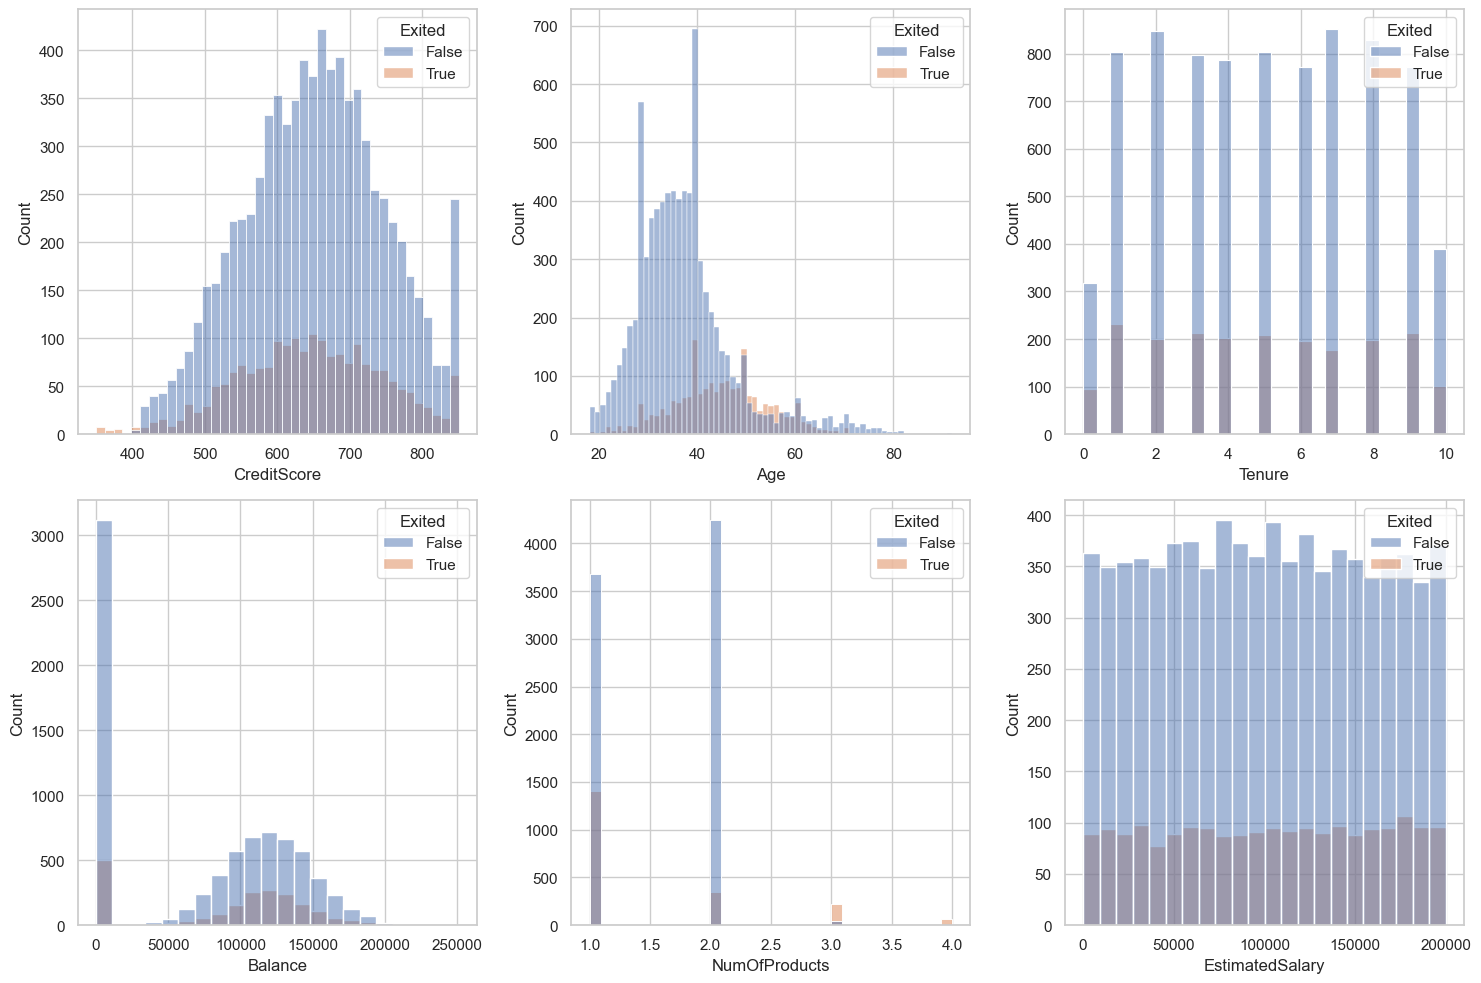

In [17]:
# including differentiation between target variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for ax, col in zip(axes.flatten(), num_cols):
    sns.histplot(data=df, x=col, hue='Exited', ax=ax)

plt.tight_layout()
plt.show()

- CreditScore: no remarkable difference between target values; normal distribution except for the highest score in both cases
- Age: slightly right skewed for exited=0 with two higher spikes at around 30 and 40; for exited=1, rather normally distributed with two spikes for a higher age -> rather older customers tend to exit
- Tenure: distributed quite equally between 1 and 9 years -> apparently no single customer longer than 10 years (maybe bank is not older than 10 years)
- Balance: very normal distribution for both expressions of the target variable, except for the conspicious spike for a balance of zero
- NumOfProducts: overall, most customers use only 1 or 2 products, 3 or 4 could almost be negelected -> interestingly, most of the customers using 3 or 4 products exited; major part of exiting customer still uses only 1 product
- EstimatedSalary: almost no difference, no single spike

Key take aways:
- Rather customers with a higher age tend to exit
- Higher numbers of products used could basically be neglected (categories 1 vs. 2 and higher)
- No siginficant differences in relation to the target variable for the rest of the features

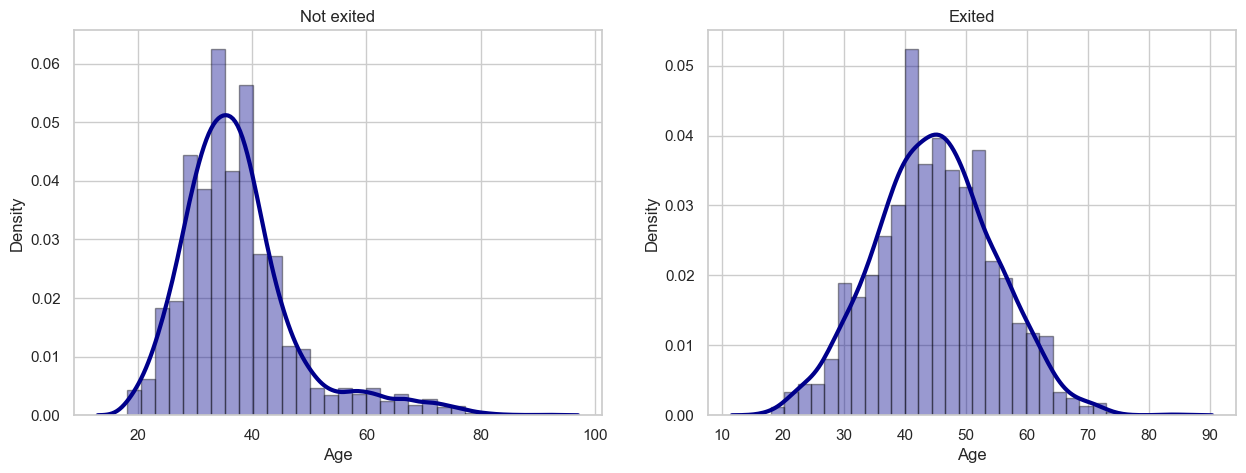

In [18]:
# further analysis of age
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df[df['Exited']==0]['Age']

sns.distplot(df[df['Exited']==0]['Age'], hist=True, kde=True, ax=ax1,
             bins=30, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
ax1.set_title('Not exited')

sns.distplot(df[df['Exited']==1]['Age'], hist=True, kde=True, ax=ax2,
             bins=30, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
ax2.set_title('Exited')

plt.show()

- Center for Exited is at a slightly higher age of around 45 compared to 30 to 35 for Not exited
- Exited has a normal distribution, while Not exited has a very little tendency to be right skewed -> the few customers with age > 70 tend to Not exit anymore (which is not that surprising :) )

#### Outlier

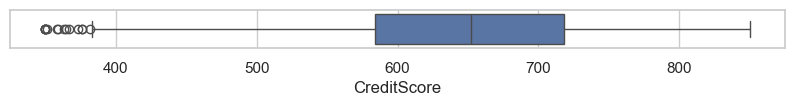

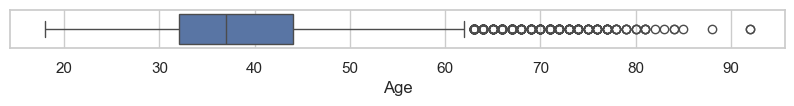

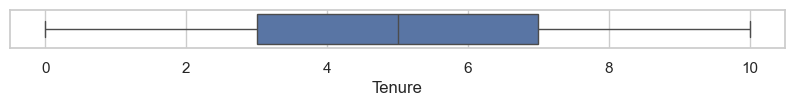

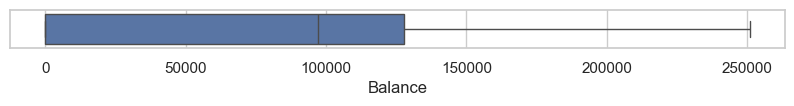

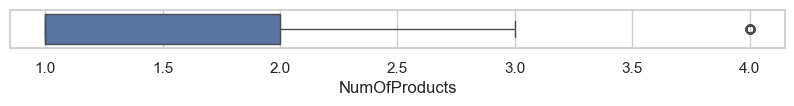

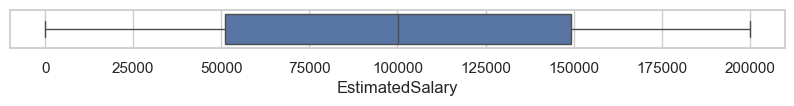

In [19]:
for col in num_cols:
    fig, ax = plt.subplots(figsize=(10,.5))
    ax = sns.boxplot(df, x=col, orient='h')
    plt.show()

- CreditScore: some outliers with a lower credit limit
- Age: Most outliers among all features; even customers older than 80 or even 90

-> Hanadle outliers of Age in Data Preprocessing

### Categorical columns

In [20]:
cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [21]:
df[cat_cols].describe()

,Geography,Gender,HasCrCard,IsActiveMember
count,10000,10000,10000,10000
unique,3,2,2,2
top,France,Male,True,True
freq,5014,5457,7055,5151


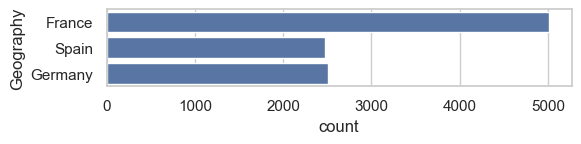

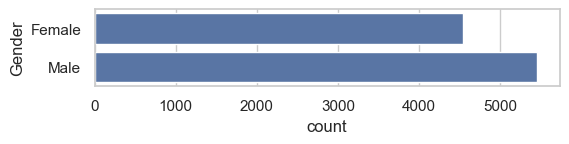

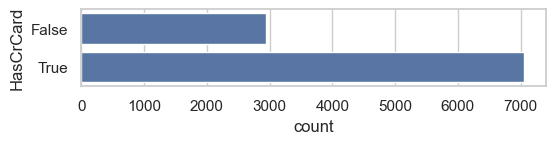

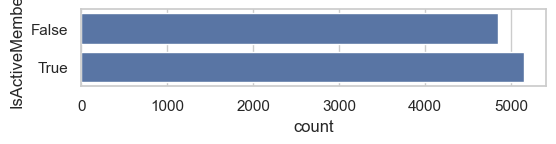

In [22]:
for col in cat_cols:
    plt.subplots(figsize=(6, 1))
    sns.countplot(data=df, y=col)
    plt.show()

- Geography: only 3 different countries; majority is from France
- Gender: slightly more male customers
- HasCrCard: way more customers own a credit card
- IsActiveMember: almost equaly bettwen active member and not an active member

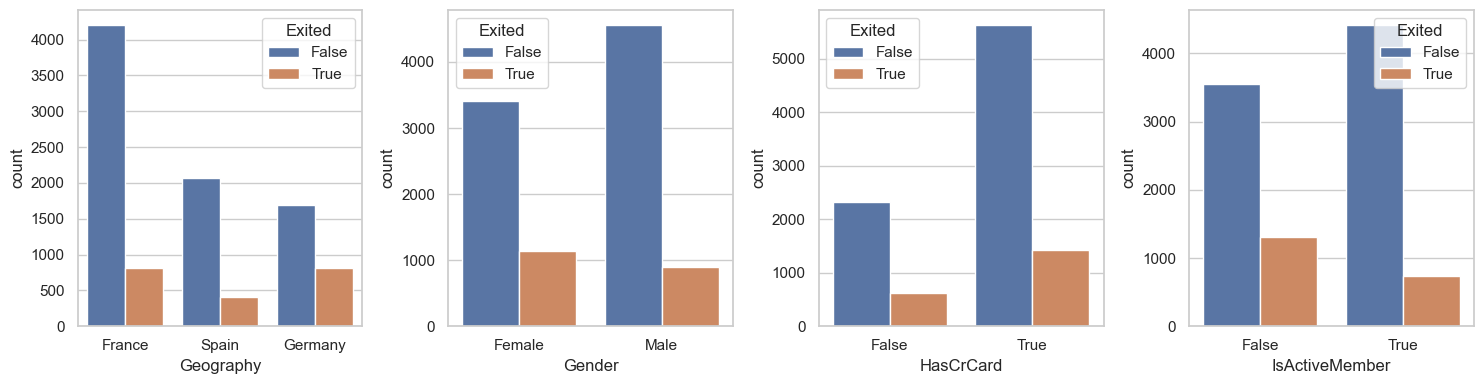

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

pos=0
for col in cat_cols:
    sns.countplot(data=df, x=col, hue='Exited', ax=axes[pos])
    pos+=1

plt.tight_layout()
plt.show()

- Geography: while total number of customers is almost equal according to above bar charts, in Germany, roughly every 3rd customer exited; ratio is less in Spain and France -> is there a problem for the bank with its operations in Germany?
- Gender: ratio of exiting is higher for female, but not significantly -> can the services of the bank be less attractive to women than to men?
- HasCrCard: even though more customers with a credit card exited, since there are also in total more customers using a credit card, the eventual ratio looks similar between exited and not exited
- IsActiveMember: significantly higher ratio of exiting customers that are not active members, which intuitively makes sense -> active member means less prone to exiting

Key take aways:
- an active membershop seems to be a good indicator for not exiting
- german customers have a high tendency for exiting

### Further analysis

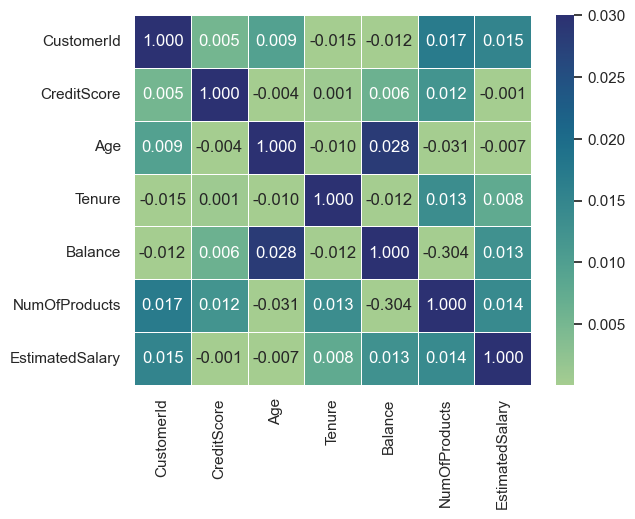

In [24]:
# correlation matrix
corr = df.select_dtypes('number').corr()

sns.heatmap(corr, annot=True, linewidth=.5, fmt=".3f", cmap='crest', vmin=.0001, vmax=.03)
plt.show()

- Interpretation?

In [25]:
# customers with zero balance
df_zero_balance = df[df['Balance']==0.00]
df_zero_balance.shape

(3617, 12)

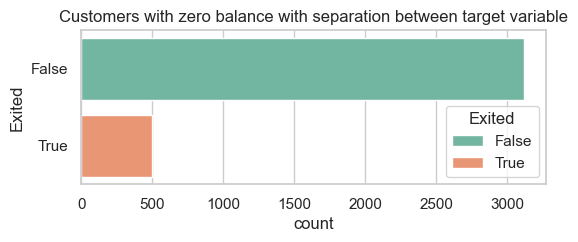

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 2))
ax = sns.countplot(data=df_zero_balance,
                   y=df_zero_balance['Exited'],
                   hue=df_zero_balance['Exited'],
                   palette="Set2")
plt.title("Customers with zero balance with separation between target variable")
plt.show()

## Preprocessing

- Check data types
- Age: Handle upper outliers in right-skewed distribution
- NumOfProducts: Divide into "1" and "2 or more" -> 3 and 4 can be ignored
- CreditScore + Age: Create new feature that expresses the relationship between CreditScore and Age

In [27]:
df = df_orig.copy()

In [28]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data type conversion

In [29]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [30]:
binary = ['HasCrCard', 'IsActiveMember']

for col in binary:
    print(col + ":", df[col].unique())

HasCrCard: [1 0]
IsActiveMember: [1 0]


In [31]:
for col in binary:
    df[col] = df[col].astype('object')

df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited               int64
dtype: object

### Outlier handling of Age

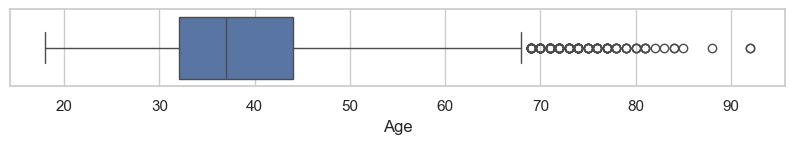

In [32]:
# apply capping upper outliers of age (right-skewed according to EDA)
plt.subplots(figsize=(10, 1))
sns.boxplot(data=df, x='Age', whis=2)
plt.show()

In [33]:
df['Age'] = np.where(df['Age'] > 68, 68, df['Age'])
print("Maximum Age: ", df['Age'].max())

Maximum Age:  68


### Feature Engineering

##### NumOfProducts
Categorizing 'NumOfProducts':
To make the model more robust, count of 3 and 4 products will be combined to 'more than 2', as it rarely happpens that customers use 4 products according to the above EDA

In [34]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [35]:
# convert to object
df['NumOfProducts'] = df['NumOfProducts'].astype('object')

In [36]:
def categorize_products(x):
    if x <= 1:
        return "Low"
    elif x == 2:
        return "Medium"
    else:
        return "High"

In [37]:
# set cateogires low, medium and high
df['ProductExhaustion'] = df['NumOfProducts'].apply(categorize_products)
df['ProductExhaustion'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

##### CreditScore + Age
Create a new feature which addresses the relationship between credit score and age

In [38]:
df['CreditScoreByAge'] = (df['CreditScore'] / df['Age']).round(1)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ProductExhaustion,CreditScoreByAge
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Low,14.7
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Low,14.8
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,High,12.0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Medium,17.9
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Low,19.8


In [39]:
df_final = df.copy()

## Modeling

In [61]:
# preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# eval
from sklearn.metrics import classification_report, make_scorer, f1_score, roc_curve, roc_auc_score
import sklearn.metrics as metrics

In [41]:
df = df_final.copy() # get df after preprocessing from above
df = df.rename(columns={"Exited": "Target"}) # rename target variable

# select only relevant featuers (exclude customer id and row number)
df = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
         'IsActiveMember', 'EstimatedSalary', 'ProductExhaustion', 'CreditScoreByAge', 'Target']]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,ProductExhaustion,CreditScoreByAge,Target
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Low,14.7,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Low,14.8,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,High,12.0,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,Medium,17.9,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Low,19.8,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Geography          10000 non-null  object 
 2   Gender             10000 non-null  object 
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  object 
 7   HasCrCard          10000 non-null  object 
 8   IsActiveMember     10000 non-null  object 
 9   EstimatedSalary    10000 non-null  float64
 10  ProductExhaustion  10000 non-null  object 
 11  CreditScoreByAge   10000 non-null  float64
 12  Target             10000 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB


### Training and evaluation

In [43]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1),
                                                    df['Target'],
                                                    test_size=0.2,
                                                    random_state=10)
print("Training set columns:", X_train.columns)
print("Testing set columns:", X_test.columns)

Training set columns: Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'ProductExhaustion', 'CreditScoreByAge'],
      dtype='object')
Testing set columns: Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'ProductExhaustion', 'CreditScoreByAge'],
      dtype='object')


In [44]:
# separate numerical, categorical and binary features
numerical = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'CreditScoreByAge']
categorical = ['Geography', 'NumOfProducts', 'ProductExhaustion']
binary = ['Gender', 'HasCrCard', 'IsActiveMember']

In [45]:
# create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(), categorical),
        ('binary', OneHotEncoder(drop='if_binary'), binary)    
    ])

preprocessor_without_scaling = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical),
        ('binary', OneHotEncoder(drop='if_binary'), binary)    
    ])

In [46]:
# create pipelines for each model
logreg_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=10)),
    ('classifier', LogisticRegression())
])

rf_pipeline = ImbPipeline([
    ('preprocessor', preprocessor_without_scaling),
    ('smote', SMOTE(random_state=10)),
    ('classifier', RandomForestClassifier(random_state=10))
])

xgb_pipeline = ImbPipeline([
    ('preprocessor', preprocessor_without_scaling),
    ('smote', SMOTE(random_state=10)),
    ('classifier', XGBClassifier(random_state=10))
])

In [47]:
# define F1 as eval metric (good for imbalanced dataset)
scorer = make_scorer(f1_score)

In [48]:
# create param grids of each model for GridSearchCV
logreg_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
}

rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}

xgb_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
}

In [49]:
# create dictionaries for models and param grids for better structure
models = {'Logistic Regression': logreg_pipeline,
          'Random Forest': rf_pipeline,
          'XGBoost': xgb_pipeline}

param_grids = {'Logistic Regression': logreg_param_grid,
               'Random Forest': rf_param_grid,
               'XGBoost': xgb_param_grid}

model_names = list(models.keys())

In [59]:
# train and test each model using GridSearchCV
best_models = {}

for model in model_names:
    print(f"Training and evaluation of {model}")
    clf = GridSearchCV(models[model],
                       param_grids[model],
                       scoring=scorer,
                       cv=5)
    
    clf.fit(X_train, y_train)
    clf.best_params_
    
    # Get the best model
    best_model = clf.best_estimator_
    best_models[model] = {
        'best_model': best_model,
        'best_params': clf.best_params_,
        'best_score': clf.best_score_
    }
    
    # Print best parameters
    print(f"Best parameters for {model}: {clf.best_params_}")
    
    # Print best F1 score
    print(f"Best F1 score for {model}: {clf.best_score_}")
    
    # Predictions on the test set
    y_pred = best_model.predict(X_test)
    
    # Print classification report
    print(f"Classification Report for {model}:\n{classification_report(y_test, y_pred)}\n")

Training and evaluation of Logistic Regression
Best parameters for Logistic Regression: {'classifier__C': 0.1}
Best F1 score for Logistic Regression: 0.5664989937684302
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1578
           1       0.45      0.74      0.56       422

    accuracy                           0.76      2000
   macro avg       0.68      0.75      0.70      2000
weighted avg       0.82      0.76      0.77      2000


Training and evaluation of Random Forest
Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best F1 score for Random Forest: 0.5057306610900771
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1578
           1       0.37      0.69      0.48 

### ROC / AUC analysis

#### Best Log reg model

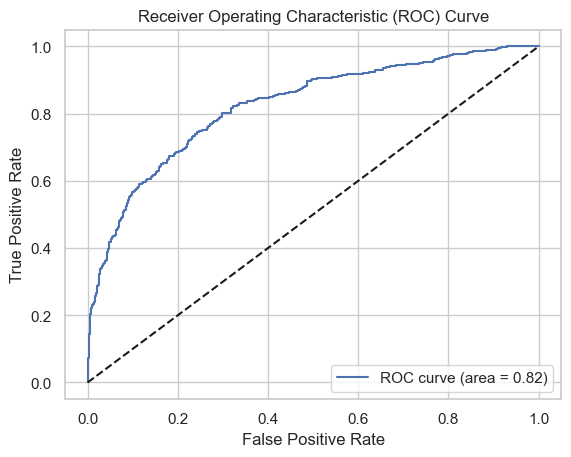

In [91]:
best_logreg_model = best_models['Logistic Regression']['best_model']
# Predict probabilities on the test set
y_pred_proba = best_logreg_model.predict_proba(X_test)[:, 1]

fpr, tpr, tresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (area = {round(roc_auc_score(y_test, y_pred_proba), 2)})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Best Random forest model

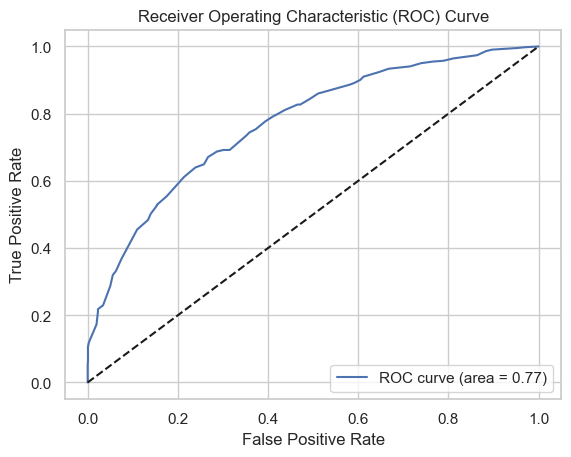

In [92]:
best_rf_model = best_models['Random Forest']['best_model']
# Predict probabilities on the test set
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, tresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (area = {round(roc_auc_score(y_test, y_pred_proba), 2)})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Best XGBoost model

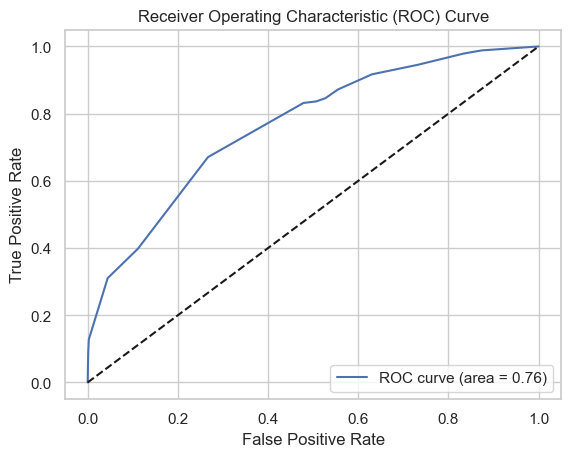

In [94]:
best_xgb_model = best_models['XGBoost']['best_model']
# Predict probabilities on the test set
y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, tresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (area = {round(roc_auc_score(y_test, y_pred_proba), 2)})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

- ROC / AUC analysis confirms, that Log reg model with its best params is the best model among theses

#### Evaluation
- All models exhibit a similar behavior regarding precision, recall, and F1 score for both classes '0' and '1'.
- The low precision scores for class '1' (churn) may be attributed to the imbalanced dataset, where the number of churning customers is relatively small. The effect of applying SMOTE might not be sufficient to address this imbalance.
- Logistic regression consistently outperforms the other models, demonstrating the best overall performance.
- The ROC/AUC analysis supports this, with the ROC curve for logistic regression having the largest area under the curve.

#### Conclusion
- The primary goal is to prevent customers from churning, making the recall for class '1' a crucial metric (i.e., how many of the actual churning customers are correctly identified) -> with regard to the trade off between recall and precision, it is less critical to address some customers who might not churn, compared to the potential loss incurred by overlooking customers who are indeed at risk of churning.
- Logistic regression achieves the highest recall for class '1' (74%), indicating that it effectively identifies a significant portion of customers who are likely to churn.
- While logistic regression shows promising results, there is still room for improvement, especially considering the relatively low precision score (45%). This suggests that in 45% of the cases where the model predicts a customer will churn, the prediction is correct.
- The imbalanced dataset poses a challenge, and efforts should be made to acquire more data on churning customers to enhance model performance.
- The model can be utilized to prevent a substantial number of customers from churning. Simultaneously, collecting more data on churning customers, extending on feature engineering or trying more fine-tuning of hyperparameters (e.g. larger range for the regularization param in log reg) could further improve the model's effectiveness.
- Logistic regression emerges as the best-performing model for the current task, providing a solid foundation for future enhancements and refinements.

## Finalization of the model

In [104]:
X = df.drop('Target', axis=1)
y = df['Target']

final_model = best_logreg_model.fit(X, y)

In [105]:
import joblib
joblib.dump(final_model, 'final_model.pk1')

final_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'EstimatedSalary',
                                                   'CreditScoreByAge']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Geography', 'NumOfProducts',
                                                   'ProductExhaustion']),
                                                 ('binary',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Gender', 'HasCrCard',
                                                   'IsActiveMember'])])),
                ('smote', SMOTE(random_state=10)),
                ('classifier', LogisticRegression(C=0.1))])